<h1 align="center">Estadística de Fermi-Dirac</h1>
<div align="right">David A. Miranda, PhD<br>2022</div>

## 1. Importar librería

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy import constants as ct

## 2. Planteamiento del problema

Sea un gas ideal formado por $N$ fermiones que ocupan un volumen $V$; dicho gas está a una temperatura absoluta $T$, con $\beta=1/k_B T$ y su potencial químico es $\mu$. El valor esperado $\langle n_E \rangle$ del número de ocupación del estado con energía entre $E$ y $E+\delta E$ está dado por:

$$ \langle n_E \rangle = \frac{1}{e^{\beta(E-\mu)}+1} \qquad (1)$$

La desviación estándar $\sigma_{n_E}$ del número de ocupación del estado con energía entre $E$ y $E+\delta E$ está dado por:

$$ \sigma = \langle n_E \rangle \sqrt{ \frac{1}{\langle n_E \rangle} - 1  } \qquad (2)$$

¿Cómo se comporta el valor esperado del número de ocupación del estado $E$ para $T \rightarrow 0$ y para temperaturas mayores?

Ver [expicación](https://youtu.be/09nq4bGjpvs).

## 3. Definiciones y métodos 

In [2]:
def mean_occupation_number(x, T=1):
    n = 1/( np.exp(x/T) + 1 )
    n[n<0] = np.NaN
    return n

In [3]:
def std_occupation_number(x, T=1):
    mean_nE = mean_occupation_number(x, T=T)
    σ = mean_nE * np.sqrt( 1/mean_nE - 1)
    return σ

In [4]:
def plot(T=1, color='k', lw=2, alpha=0.2, marker='+', xlim=[-10, 10]):
    x  = np.linspace(xlim[0], xlim[1], 1000)
    xe = np.linspace(xlim[0], xlim[1], 21)
    xe = np.concatenate((np.r_[xlim[0]], xe, np.r_[xlim[1]]))
    n  = mean_occupation_number(x, T=T)
    ne = mean_occupation_number(xe, T=T)
    σ  = std_occupation_number(x, T=T)
    σe = std_occupation_number(xe, T=T)
    plt.plot(x, n, color=color, lw=2)
    for k in range(len(xe)):
        plt.vlines(xe[k], ne[k]-σe[k], ne[k]+σe[k], color=color, lw=2, alpha=alpha)
    plt.xlim(min(x), max(x))

## 4. Figuras

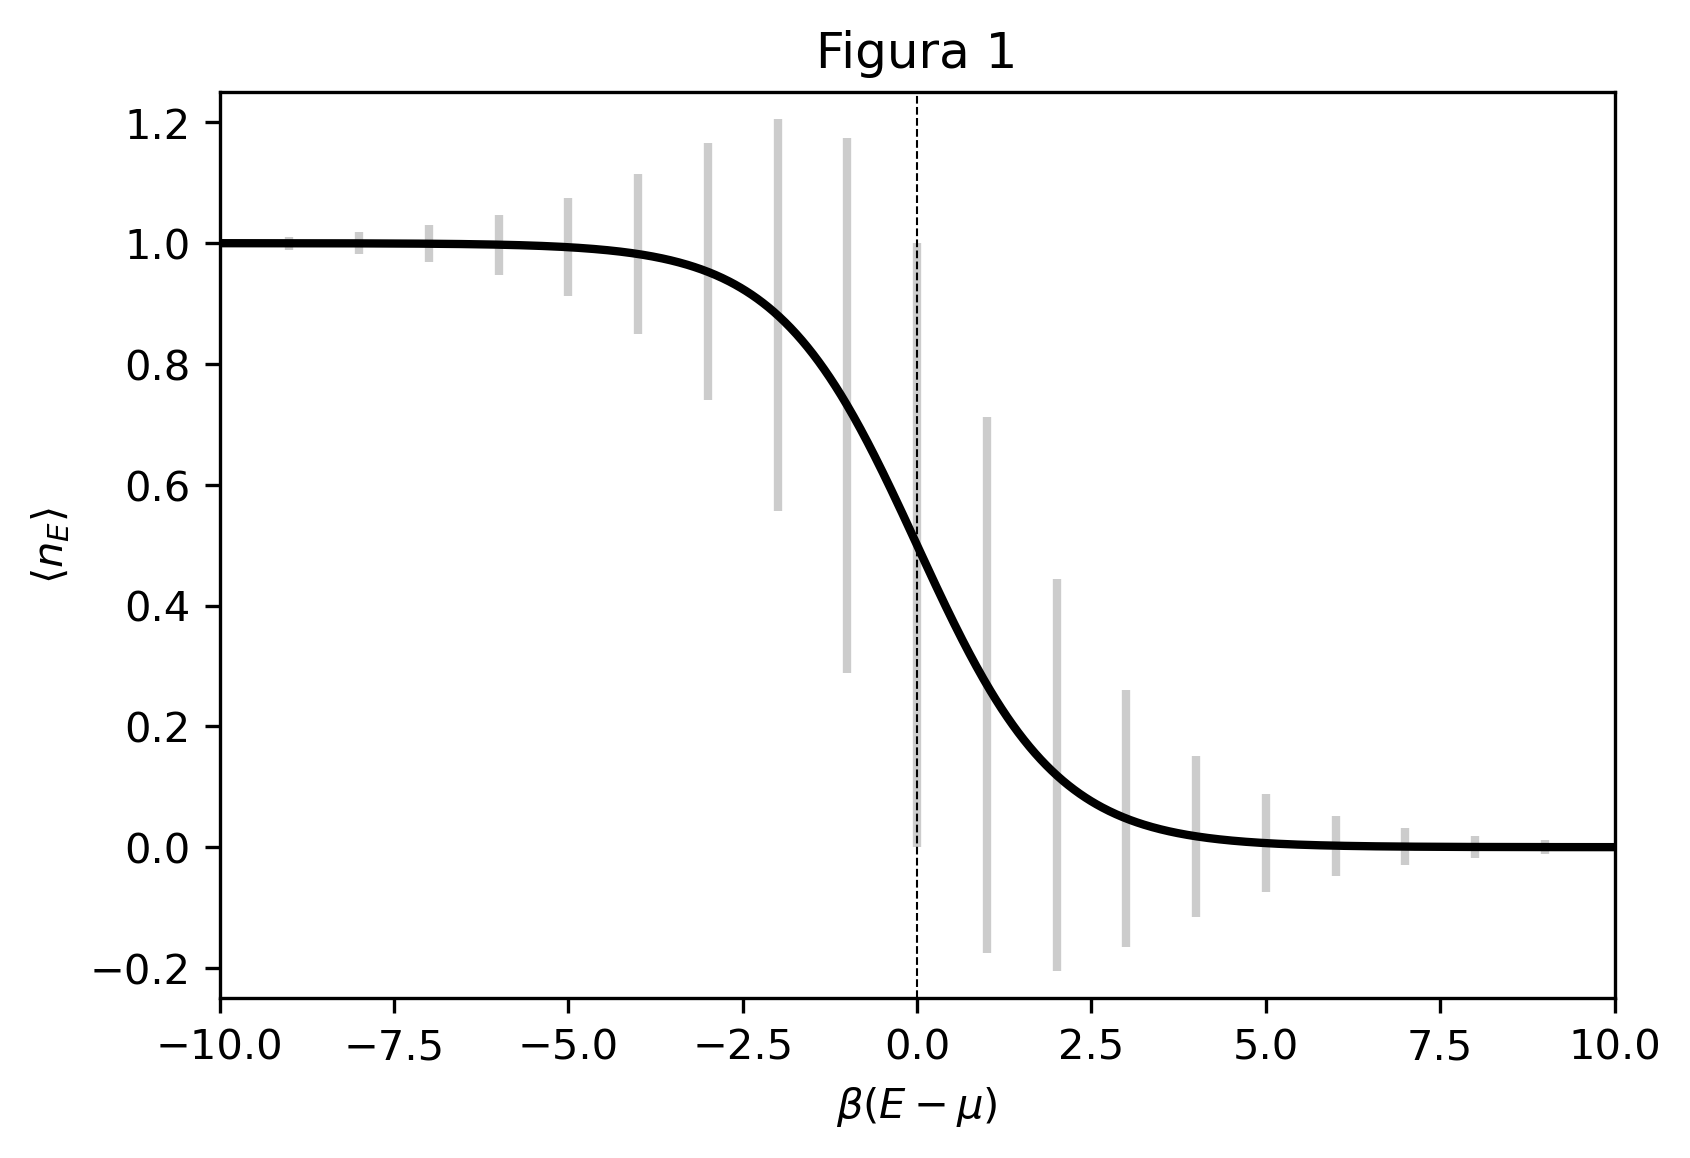

In [5]:
plt.figure(dpi=300)
ylim = [-0.25, 1.25]
plot(color='k')
plt.ylim(ylim[0], ylim[1])
plt.vlines(0, ylim[0], ylim[1], color='k', linestyles='--', lw=0.5)
plt.xlabel(r'$\beta(E-\mu)$')
plt.ylabel(r'$\langle n_E \rangle $')
_ = plt.title('Figura 1')

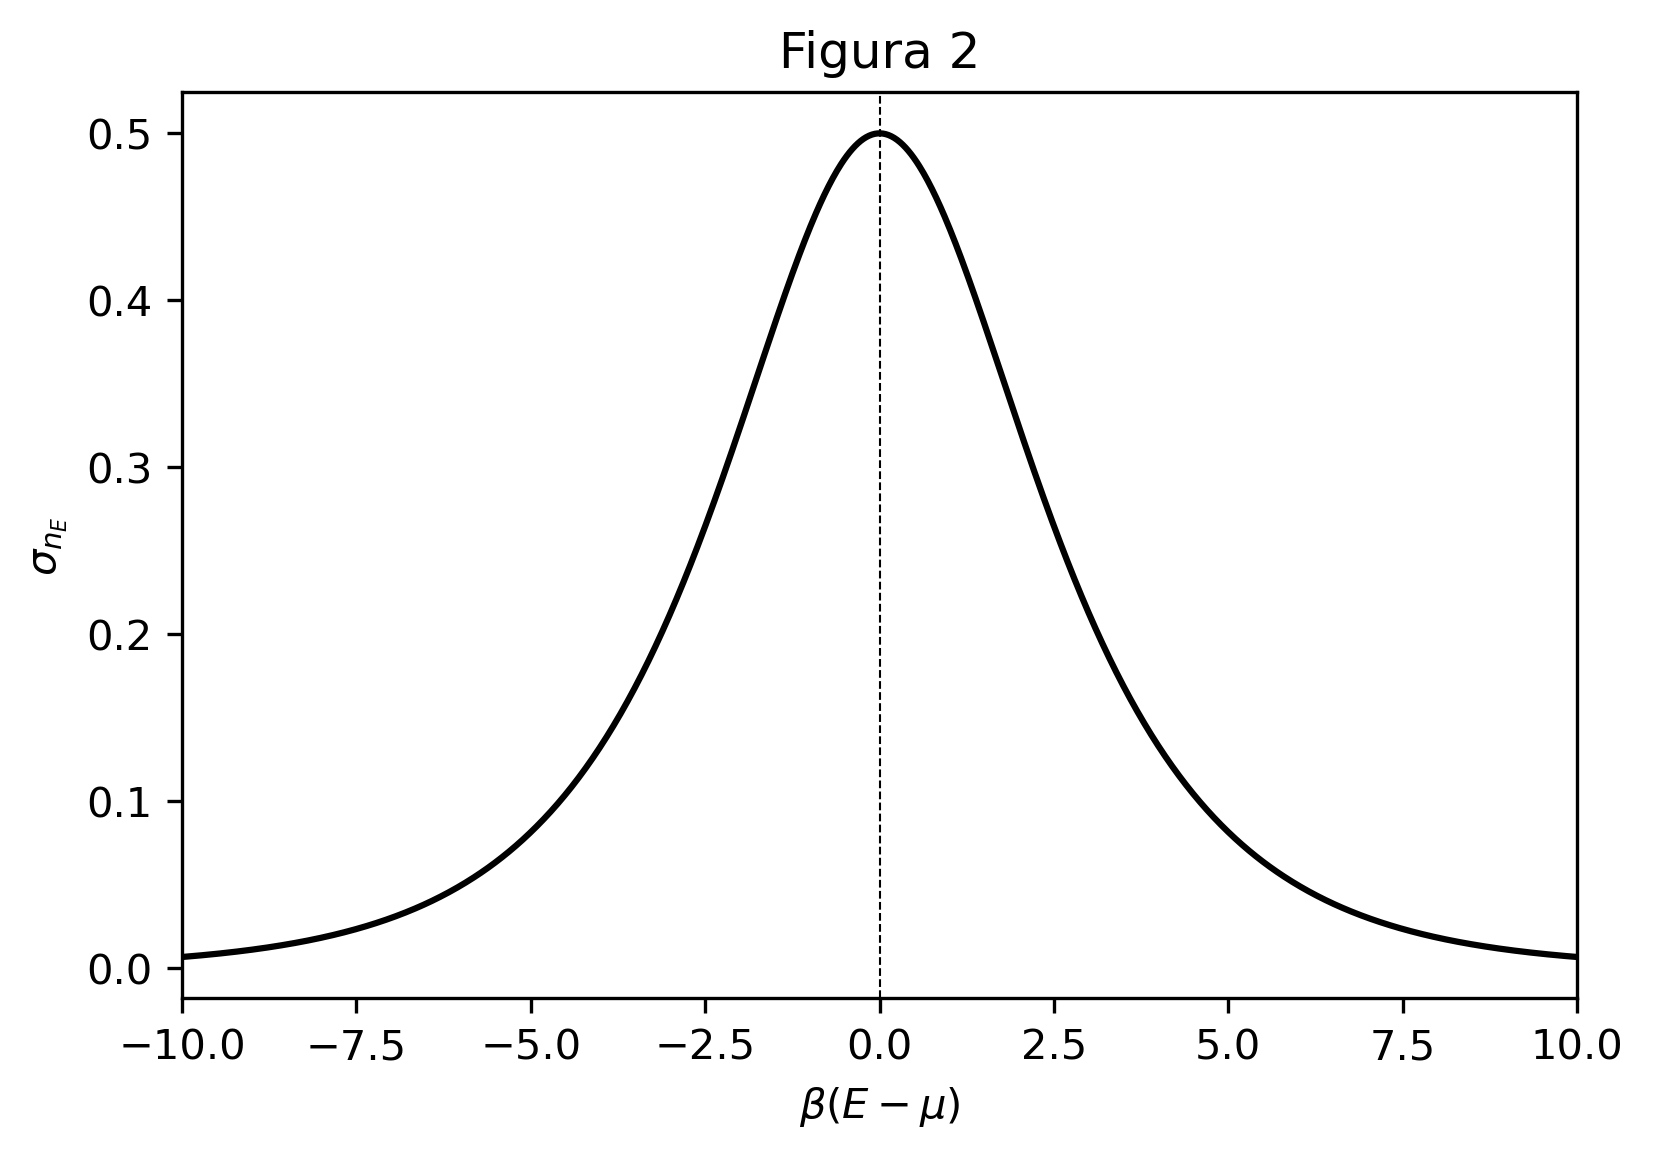

In [6]:
plt.figure(dpi=300)
ylim = [-1, 11]
color = ['r', 'k', 'b']
x = np.linspace(-10, 10, 1000)
σ  = std_occupation_number(x)
plt.plot(x, σ, color='k')
ax = plt.axis()
plt.xlim(min(x), max(x))
plt.ylim(ax[2], ax[3])
plt.vlines(0, ax[2], ax[3], color='k', linestyles='--', lw=0.5)
plt.xlabel(r'$\beta(E-\mu)$')
plt.ylabel(r'$\sigma_{n_E}$')
_ = plt.title('Figura 2')

## 5. Preguntas de autoexplicación

5.1. Interprete las figuras 1 y 2.

5.2. ¿Cómo se comporta el valor esperado del número de ocupación cuando la temperatura absoluta tiende a cero? Realice el cálculo analítico, la gráfica e interprete los resultados.

5.3. ¿Cómo se comporta el valor esperado del número de ocupación cuando la temperatura absoluta tiende a cero? Realice el cálculo analítico, la gráfica e interprete los resultados.

5.4. ¿Cómo se comporta el valor esperado del número de ocupación y su desviación estándar para temperaturas muy altas? Realice el cálculo analítico, la gráfica e interprete los resultados.

End!